<a href="https://colab.research.google.com/github/prd-dahal/AI_Projects/blob/master/L_Layer_Deep_Neural_Network_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **L Layer Deep Neural Network without Regularization**

In [0]:
#dependencies
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Main Class 

class NeuralNetwork:
  #initialize the class with hyperparameters. Here L is the depth and N is the array 
  #that contains the no of node in each Depth
  def __init__(self, alpha=0.01, num_iter = 25, verbose='False', threshold=0.0001, L=2, N=[4,1]):
    self.alpha = alpha
    self.num_iter = num_iter
    self.verbose = verbose 
    self.threshold = threshold 
    self.L = L
    self.N = N
    self.nx = 0
    self.m = 0
    self.W = {}
    self.B = {}

    #variable for forward propagation
    self.Z = {}
    self.A = {}

    #variable for backward propagation
    self.dZ = {}
    self.dW = {}
    self.dB = {}
    self.dA = {}

  def __sigmoid(self,x):
    return 1/(1+np.exp(-x))
   
  #relu activation
  def __relu(self,Z):
    return np.maximum(0,Z)
  
  #relu derivative activation
  def __reluDerivative(self,Z):
       Z[Z<=0] = 0
       Z[Z>0] = 1
       return Z
  
  #predict the value for given input x
  def predict(self,x):
    A = {}
    A[0] = x
    Z = {}
    for i in range(1,self.L+1):
        if(i<(self.L)):
          Z[i] = np.dot(self.W[i], A[i-1])+ self.B[i]
          A[i] = self.__relu(Z[i])
        else:
          Z[i] = np.dot(self.W[i],A[i-1])+self.B[i]
          A[i] = self.__sigmoid(Z[i])
    return A[self.L].mean()
  
  #initialize weights   
  def __weightInitialize(self):
    self.N.insert(0,self.nx)
    
    for i in range(1,self.L+1):
      self.W[i] = np.random.randn(self.N[i],self.N[i-1])
      self.B[i] = np.random.randn(self.N[i],1)
    
  def fit(self,X,y):
    self.nx = X.shape[0]
    self.m = X.shape[1]

    #initialize all the weights and bias
    self.__weightInitialize()
    self.A[0] = X
    
    #epoch start from here
    for t in range(self.num_iter):

      ##START OF FORWARD PROPAGATION
      for i in range(1,self.L+1):
        if(i<(self.L)):
          self.Z[i] = np.dot(self.W[i], self.A[i-1])+ self.B[i]
          self.A[i] = self.__relu(self.Z[i])
        else:
          self.Z[i] = np.dot(self.W[i],self.A[i-1])+self.B[i]
          self.A[i] = self.__sigmoid(self.Z[i])  
      ##END OF FORWARD PROPAGATION
      
      #ERROR CALCULATION
      j = - (y * np.log(self.A[self.L]) + (1-y) * np.log(1-self.A[self.L])) #error calculation
      J = j.mean()
      if(self.verbose==True):
        print("The error at this iteration {} is {}".format(t,J))
      if(J<self.threshold):
        break

      ##START OF BACKWARD PROPAGATION
      self.dZ[self.L] = self.A[self.L] - y
      self.dW[self.L] = (1/self.m) * np.dot(self.dZ[self.L],self.A[self.L].T)
      self.dB[self.L] = (1/self.m) * np.sum(self.dZ[self.L],axis=1,keepdims=True)
      self.dA[self.L-1] = np.dot(self.W[self.L].T, self.dZ[self.L]) 
      for i in range(self.L-1,0,-1):
        self.dZ[i] = self.dA[i] * self.__reluDerivative(self.Z[i])
        self.dW[i] = (1/self.m) * np.dot(self.dZ[i],self.A[i-1].T)
        self.dB[i] = (1/self.m) * np.sum(self.dZ[i],axis=1, keepdims=True)
        self.dA[i-1] = np.dot(self.W[i].T,self.dZ[i])
      ##END OF BACKWARD PROPAGATION

      ##WEIGHT UPDATE START
      for i in range(1,self.L+1):
        self.W[i] = self.W[i] - self.alpha * self.dW[i]
        self.B[i] = self.B[i] - self.alpha * self.dB[i]
      ## WEIGHT UPDATE ENDS     

if __name__ == '__main__':
  X = np.array([[1,2,3],
                [4,5,6],
                [8,9,10],
                [11,12,13]])
  X = X.T
  y = np.array([1,0,1,1])

  nn = NeuralNetwork(alpha=0.01, verbose=True, num_iter=500, threshold = 0.4, L=3, N=[4,3,1])
  nn.fit(X,y)
  print('The predicted value is::{}'.format(nn.predict(np.array([10,12,23]))))

The error at this iteration 0 is 1.151056066810515
The error at this iteration 1 is 1.14841354795246
The error at this iteration 2 is 1.145780561019504
The error at this iteration 3 is 1.1431570973099285
The error at this iteration 4 is 1.140543147899793
The error at this iteration 5 is 1.137938703644028
The error at this iteration 6 is 1.1353437551775487
The error at this iteration 7 is 1.1327582929163893
The error at this iteration 8 is 1.130182307058853
The error at this iteration 9 is 1.1276157875866846
The error at this iteration 10 is 1.125058724266259
The error at this iteration 11 is 1.1225111066497893
The error at this iteration 12 is 1.1199729240765532
The error at this iteration 13 is 1.1174441656741367
The error at this iteration 14 is 1.1149248203596942
The error at this iteration 15 is 1.1124148768412279
The error at this iteration 16 is 1.1099143236188829
The error at this iteration 17 is 1.1074231489862596
The error at this iteration 18 is 1.1049413410317408
The error a

## **L Layer Deep Neural Network with L1 Regularization**

The predicted value is::0.0919170594170807
500


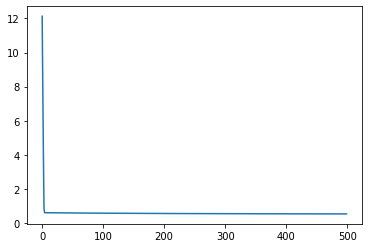

In [7]:
#Main Class 

class NeuralNetworkR:
  #initialize the class with hyperparameters. Here L is the depth and N is the array 
  #that contains the no of node in each Depth
  def __init__(self, alpha=0.01, num_iter = 25, verbose='False', threshold=0.0001, L=2, N=[4,1], lambd=1):
    self.alpha = alpha
    self.num_iter = num_iter
    self.verbose = verbose 
    self.threshold = threshold 
    self.L = L
    self.N = N
    self.lambd = lambd
    self.nx = 0
    self.m = 0
    self.W = {}
    self.B = {}
    self.JArray = list()
    self.reg_sum = 0
    #variable for forward propagation
    self.Z = {}
    self.A = {}

    #variable for backward propagation
    self.dZ = {}
    self.dW = {}
    self.dB = {}
    self.dA = {}

  def __sigmoid(self,x):
    return 1/(1+np.exp(-x))
   
  #relu activation
  def __relu(self,Z):
    return np.maximum(0,Z)
  
  #relu derivative activation
  def __reluDerivative(self,Z):
       Z[Z<=0] = 0
       Z[Z>0] = 1
       return Z
  
  #predict the value for given input x
  def predict(self,x):
    A = {}
    A[0] = x
    Z = {}
    for i in range(1,self.L+1):
        if(i<(self.L)):
          Z[i] = np.dot(self.W[i], A[i-1])+ self.B[i]
          A[i] = self.__relu(Z[i])
        else:
          Z[i] = np.dot(self.W[i],A[i-1])+self.B[i]
          A[i] = self.__sigmoid(Z[i])
    return A[self.L].mean()
  
  #initialize weights   
  def __weightInitialize(self):
    self.N.insert(0,self.nx)
    
    for i in range(1,self.L+1):
      self.W[i] = np.random.randn(self.N[i],self.N[i-1])
      self.B[i] = np.random.randn(self.N[i],1)
  
  #return array of errors 
  def array_error(self):
    return self.num_iter,self.JArray
  
  def fit(self,X,y):
    self.nx = X.shape[0]
    self.m = X.shape[1]

    #initialize all the weights and bias
    self.__weightInitialize()
    self.A[0] = X
    
    #epoch start from here
    for t in range(self.num_iter):

      ##START OF FORWARD PROPAGATION
      for i in range(1,self.L+1):
        if(i<(self.L)):
          self.Z[i] = np.dot(self.W[i], self.A[i-1])+ self.B[i]
          self.A[i] = self.__relu(self.Z[i])
        else:
          self.Z[i] = np.dot(self.W[i],self.A[i-1])+self.B[i]
          self.A[i] = self.__sigmoid(self.Z[i])  
      ##END OF FORWARD PROPAGATION
      
      #ERROR CALCULATION
      j = - (y * np.log(self.A[self.L]) + (1-y) * np.log(1-self.A[self.L])) #error calculation
      
      #calculate regularization factor
      for i in range(1,self.L+1):
        self.reg_sum = self.reg_sum + np.sum(self.W[i]*self.W[i])
        self.reg_sum = (self.lambd / (2* self.m)) * self.reg_sum

      J = j.mean() + self.reg_sum
      self.JArray.append(J)
      if(self.verbose==True):
        print("The error at this iteration {} is {}".format(t,J))
      if(J<self.threshold):
        break

      ##START OF BACKWARD PROPAGATION
      self.dZ[self.L] = self.A[self.L] - y
      self.dW[self.L] = ((1/self.m) * np.dot(self.dZ[self.L],self.A[self.L].T)) + ((self.lambd/self.m)* self.W[self.L])
      self.dB[self.L] = (1/self.m) * np.sum(self.dZ[self.L],axis=1,keepdims=True)
      self.dA[self.L-1] = np.dot(self.W[self.L].T, self.dZ[self.L]) 
      for i in range(self.L-1,0,-1):
        self.dZ[i] = self.dA[i] * self.__reluDerivative(self.Z[i])
        self.dW[i] = (1/self.m) * np.dot(self.dZ[i],self.A[i-1].T) + ((self.lambd/self.m)* self.W[i])
        self.dB[i] = (1/self.m) * np.sum(self.dZ[i],axis=1, keepdims=True)
        self.dA[i-1] = np.dot(self.W[i].T,self.dZ[i])
      ##END OF BACKWARD PROPAGATION

      ##WEIGHT UPDATE START
      for i in range(1,self.L+1):
        self.W[i] = self.W[i] - self.alpha * self.dW[i]
        self.B[i] = self.B[i] - self.alpha * self.dB[i]
      ## WEIGHT UPDATE ENDS     

if __name__ == '__main__':
  X = np.array([[1,2,3],
                [4,5,6],
                [8,9,10],
                [11,12,13]])
  X = X.T
  y = np.array([1,0,1,1])

  nnr = NeuralNetworkR(alpha=0.01, verbose=False, num_iter=500, threshold = 0.4, L=3, N=[4,3,1], lambd=0.1)
  nnr.fit(X,y)
  print('The predicted value is::{}'.format(nnr.predict(np.array([10,12,23]))))
  num_iter, JArray = nnr.array_error()
  print(num_iter)

  plt.plot(range(num_iter),JArray)
  plt.show()

In [30]:
for i in range(1,3):
  print(i)

1
2


# Neural Network with DropOut and Regularized Weight Initialization

In [36]:
#Main Class 

class NeuralNetworkD:
  #initialize the class with hyperparameters. Here L is the depth and N is the array 
  #that contains the no of node in each Depth
  def __init__(self, alpha=0.01, num_iter = 25, verbose='False', threshold=0.0001, L=2, N=[4,1], lambd=1,dropout=[1,0.8,1,1]):
    
    #hyperparameter
    self.alpha = alpha
    self.num_iter = num_iter
    self.verbose = verbose 
    self.threshold = threshold 
    self.L = L
    self.N = N
    self.lambd = lambd
    self.dropout = dropout
    
    #parameter
    self.nx = 0
    self.m = 0
    self.W = {}
    self.B = {}
    self.JArray = list()
    self.d = {}
    #variable for forward propagation
    self.Z = {}
    self.A = {}

    #variable for backward propagation
    self.dZ = {}
    self.dW = {}
    self.dB = {}
    self.dA = {}

  def __sigmoid(self,x):
    return 1/(1+np.exp(-x))
   
  #relu activation
  def __relu(self,Z):
    return np.maximum(0,Z)
  
  #relu derivative activation
  def __reluDerivative(self,Z):
       Z[Z<=0] = 0
       Z[Z>0] = 1
       return Z
  
  #predict the value for given input x
  def predict(self,x):
    A = {}
    
    A[0] = x
    Z = {}
    for i in range(1,self.L+1):
        if(i<(self.L)):
          Z[i] = np.dot(self.W[i], A[i-1])+ self.B[i]
          A[i] = self.__relu(Z[i])
        else:
          Z[i] = np.dot(self.W[i],A[i-1])+self.B[i]
          A[i] = self.__sigmoid(Z[i])
    return A[self.L].mean()
  
  #initialize weights   
  def __weightInitialize(self):
    self.N.insert(0,self.nx)
    
    for i in range(1,self.L+1):
      self.W[i] = np.random.randn(self.N[i],self.N[i-1]) * np.sqrt(1/self.N[i-1])
      self.B[i] = np.random.randn(self.N[i],1)
  
  #return array of errors 
  def array_error(self):
    return self.num_iter,self.JArray
  
  def fit(self,X,y):
    self.nx = X.shape[0]
    self.m = X.shape[1]

    #initialize all the weights and bias
    self.__weightInitialize()
    self.A[0] = X
    
    #epoch start from here
    for t in range(self.num_iter):

      ##START OF FORWARD PROPAGATION
      for i in range(1,self.L+1):
        if(i<(self.L)):
          self.Z[i] = np.dot(self.W[i], self.A[i-1])+ self.B[i]
          self.A[i] = self.__relu(self.Z[i])
          self.d[i] = np.random.rand(self.A[i].shape[0],self.A[i].shape[1])<self.dropout[i]
          self.A[i] = (self.A[i] * self.d[i])/self.dropout[i]
        else:
          
          self.Z[i] = np.dot(self.W[i],self.A[i-1])+self.B[i]
          self.A[i] = self.__sigmoid(self.Z[i])  
          self.d[i] = np.random.rand(self.A[i].shape[0],self.A[i].shape[1])<self.dropout[i]
          self.A[i] = (self.A[i] * self.d[i])/self.dropout[i]
      ##END OF FORWARD PROPAGATION
      
      #ERROR CALCULATION
      j = - (y * np.log(self.A[self.L]) + (1-y) * np.log(1-self.A[self.L])) #error calculation
      J = j.mean()
      self.JArray.append(J)
      if(self.verbose==True):
        print("The error at this iteration {} is {}".format(t,J))
      if(J<self.threshold):
        break

      ##START OF BACKWARD PROPAGATION
      self.dZ[self.L] = self.A[self.L] - y
      self.dW[self.L] = ((1/self.m) * np.dot(self.dZ[self.L],self.A[self.L].T))
      self.dB[self.L] = (1/self.m) * np.sum(self.dZ[self.L],axis=1,keepdims=True)
      self.dA[self.L-1] = np.dot(self.W[self.L].T, self.dZ[self.L]) 
      for i in range(self.L-1,0,-1):
        self.dZ[i] = self.dA[i] * self.__reluDerivative(self.Z[i])
        self.dW[i] = (1/self.m) * np.dot(self.dZ[i],self.A[i-1].T)
        self.dB[i] = (1/self.m) * np.sum(self.dZ[i],axis=1, keepdims=True)
        self.dA[i-1] = np.dot(self.W[i].T,self.dZ[i])
      ##END OF BACKWARD PROPAGATION

      ##WEIGHT UPDATE START
      for i in range(1,self.L+1):
        self.W[i] = self.W[i] - self.alpha * self.dW[i]
        self.B[i] = self.B[i] - self.alpha * self.dB[i]
      ## WEIGHT UPDATE ENDS     

if __name__ == '__main__':
  X = np.array([[1,2,3],
                [4,5,6],
                [8,9,10],
                [11,12,13]])
  X = X.T
  y = np.array([1,0,1,1])

  nnd = NeuralNetworkD(alpha=0.01, verbose=False, num_iter=500, threshold = 0.4, L=3, N=[4,3,1], lambd=0.1)
  nnd.fit(X,y)
  print('The predicted value is::{}'.format(nnd.predict(np.array([10,12,23]))))
  # num_iter, JArray = nnd.array_error()
  # print(num_iter)

  # plt.plot(range(num_iter),JArray)
  # plt.show()

The predicted value is::0.37777656621332795
